# 第9章 教師なし学習

## 9.1 2次元入力データ

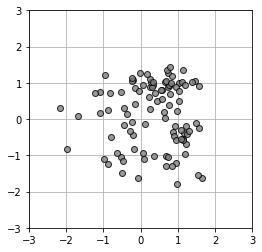

In [1]:
# リスト 9-1-(1)
%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt

# データ生成 ----------
np.random.seed(seed=1)  # 乱数を固定
N = 100                 # データの数
K = 3                   # ガウス分布の数
T = np.zeros((N, 3), dtype=np.uint8)  # 空のTを準備
X = np.zeros((N, 2))                  # 空のXを準備
X0_min, X0_max = -3, 3  # x0の範囲、表示用
X1_min, X1_max = -3, 3  # x1の範囲、表示用
prm_mu = np.array([[-0.5, -0.5], [0.5, 1.0], [1, -0.5]])  # 分布の中心
prm_sig = np.array([[0.7, 0.7], [0.8, 0.3], [0.3, 0.8]])  # 分布の分散
prm_pi = np.array([0.4, 0.8, 1])  # 各分布への割合を決めるパラメータ
cols = ["cornflowerblue", "black", "white"]  # 結果表示用
# TはXを作るために決めるが、データにはしない
for n in range(N):
    r = np.random.rand()
    for k in range(K):
        if r < prm_pi[k]:
            T[n, k] = 1
            break
    for k in range(2):
        X[n, k] = \
            np.random.randn() * prm_sig[T[n, :] == 1, k] \
            + prm_mu[T[n, :] == 1, k]

# データの図示 ----------
def show_data(x):
    plt.plot(
        x[:, 0], x[:, 1], "gray",
        marker="o", linestyle="None",
        markeredgecolor="black",
        markersize=6, alpha=0.8,
    )
    plt.grid()

# メイン ----------
plt.figure(figsize=(4, 4))
show_data(X)
plt.xlim(X0_min, X0_max)
plt.ylim(X1_min, X1_max)
plt.show()
np.savez(
    "ch9_data.npz", X=X,
    X0_min=X0_min, X0_max=X0_max,
    X1_min=X1_min, X1_max=X1_max,
)

## 9.2 K-means法

### 9.2.1 K-means法の概要

### 9.2.2 Step0: 変数の準備と初期化

In [2]:
# リスト 9-1-(2)
# Mu と R の初期化 ----------
Mu = np.array([[-2, 1], [-2, 0], [-2, -1]])                         # (A)
R = np.c_[np.ones((N, 1), dtype=int), np.zeros((N, 2), dtype=int)]  # (B)

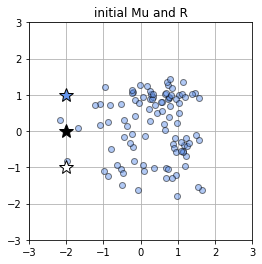

In [3]:
# リスト 9-1-(3)
# データの図示関数 ----------
def show_prm(x, r, mu, cols):
    K = r.shape[1]
    for k in range(K):
        # 入力データxの描写(クラス指示変数rで色分け)
        plt.plot(
            x[r[:, k] == 1, 0], x[r[:, k] == 1, 1], cols[k],
            marker="o", linestyle="None", markeredgecolor="black",
            markersize=6, alpha=0.5,
        )
        # クラスターの中心ベクトルmuを「星マーク」で描写
        plt.plot(
            mu[k, 0], mu[k, 1], cols[k],
            marker="*", markeredgecolor="black",
            markersize=15, markeredgewidth=1,
        )
    plt.xlim(X0_min, X0_max)
    plt.ylim(X1_min, X1_max)
    plt.grid()

# メイン ----------
plt.figure(figsize=(4, 4))
R = np.c_[np.ones((N, 1)), np.zeros((N, 2))]
show_prm(X, R, Mu, cols)
plt.title("initial Mu and R")
plt.show()

### 9.2.3 Step 1: Rの更新

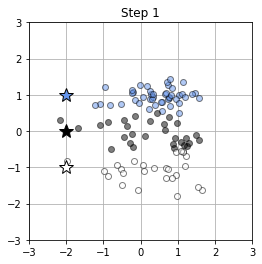

In [4]:
# リスト 9-1-(4)
# r を決める (Step 1) ----------
def step1_kmeans(x0, x1, mu):
    N = len(x0)
    K = mu.shape[0]
    r = np.zeros((N, K))
    for n in range(N):
        d = np.zeros(K)
        # 式9-4で二乗距離を計算
        for k in range(K):
            d[k] = (x0[n] - mu[k, 0]) ** 2 + (x1[n] - mu[k, 1]) ** 2  
        r[n, np.argmin(d)] = 1  # 最も近いクラスターの所属にする
    return r

# メイン ----------
plt.figure(figsize=(4, 4))
R = step1_kmeans(X[:, 0], X[:, 1], Mu)
show_prm(X, R, Mu, cols)
plt.title("Step 1")
plt.show()

### 9.2.4 Step 2: $\mu$の更新

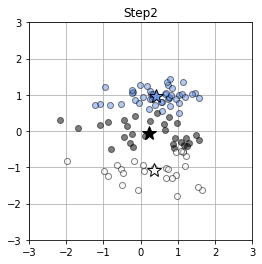

In [5]:
# リスト 9-1-(5)
# Mu を決める (Step 2) ----------
def step2_kmeans(x0, x1, r):
    K = r.shape[1]    
    mu = np.zeros((K, 2))
    # 式9-6の計算
    for k in range(K):
        N_k = np.sum(r[:, k])
        mu[k, 0] = np.sum(r[:, k] * x0) / N_k
        mu[k, 1] = np.sum(r[:, k] * x1) / N_k
    return mu

# メイン ----------
plt.figure(figsize=(4, 4))
Mu = step2_kmeans(X[:, 0], X[:, 1], R)
show_prm(X, R, Mu, cols)
plt.title("Step2")
plt.show()

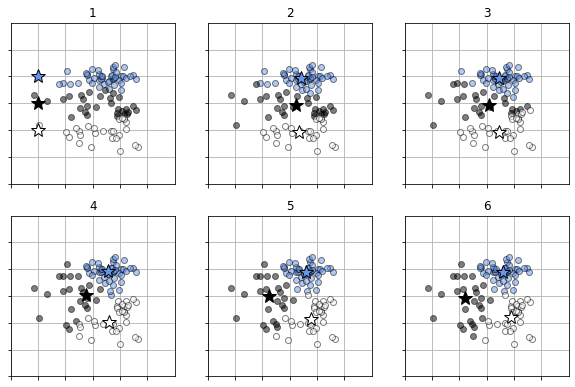

In [6]:
# リスト 9-1-(6)
plt.figure(figsize=(10, 6.5))
Mu = np.array([[-2, 1], [-2, 0], [-2, -1]])
max_it = 6  # 繰り返しの回数
for it in range(0, max_it):
    # step1、R の更新
    R = step1_kmeans(X[:, 0], X[:, 1], Mu)
    # 結果表示
    plt.subplot(2, 3, it + 1)
    show_prm(X, R, Mu, cols)
    plt.title("{0:d}".format(it + 1))
    plt.xticks(range(X0_min, X0_max), "")
    plt.yticks(range(X1_min, X1_max), "") 
    # step2、Mu の更新
    Mu = step2_kmeans(X[:, 0], X[:, 1], R)
plt.show()

### 9.2.5 歪み尺度

In [7]:
# リスト 9-1-(7)
# 目的関数 ----------
def distortion_measure(x0, x1, r, mu):
    # 入力xは2次元とし、x0、x1で入力
    N = len(x0)
    K = r.shape[1]
    J = 0
    # 式9-9の計算
    for n in range(N):
        for k in range(K):
            J = J + r[n, k] * ((x0[n] - mu[k, 0]) ** 2 \
                + (x1[n] - mu[k, 1]) ** 2)
    return J

# テスト ----------
# Mu と R の初期化
Mu = np.array([[-2, 1], [-2, 0], [-2, -1]])
R = np.c_[np.ones((N, 1), dtype=int), np.zeros((N, 2), dtype=int)]
# 歪み尺度の計算
distortion = distortion_measure(X[:, 0], X[:, 1], R, Mu)
print(f"distortion measure = {distortion:.6f}")

distortion measure = 771.709117


distortion measure = [627.54  73.39  70.39  57.59  48.31  47.28  46.86  46.86  46.86  46.86]


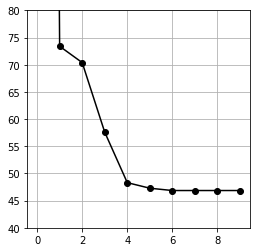

In [8]:
# リスト 9-1-(8)
# メイン ----------
# Mu と R の初期化
N = X.shape[0]
Mu = np.array([[-2, 1], [-2, 0], [-2, -1]])
R = np.c_[np.ones((N, 1), dtype=int), np.zeros((N, 2), dtype=int)]
# k-means 法のステップごとで歪み尺度を計算
max_it = 10
it = 0
DM = np.zeros(max_it)  # 歪み尺度の計算結果を入れる配列を準備
for it in range(0, max_it):                               # K-means 法
    R = step1_kmeans(X[:, 0], X[:, 1], Mu)                # step1
    DM[it] = distortion_measure(X[:, 0], X[:, 1], R, Mu)  # 歪み尺度
    Mu = step2_kmeans(X[:, 0], X[:, 1], R)                # step2
# 結果表示
print("distortion measure =", np.round(DM, 2))

# グラフ描画 ----------
plt.figure(figsize=(4, 4))
plt.plot(DM, "black", linestyle="-", marker="o")
plt.ylim(40, 80)
plt.grid()
plt.show()

## 9.3 混合ガウスモデル

### 9.3.1 確率的クラスタリング

### 9.3.2 混合ガウスモデル

In [9]:
%reset

Once deleted, variables cannot be recovered. Proceed (y/[n])? y


In [10]:
# リスト 9-2-(1)
import numpy as np

data = np.load("ch9_data.npz")
X = data["X"]
X0_min = data["X0_min"]
X0_max = data["X0_max"]
X1_min = data["X1_min"]
X1_max = data["X1_max"]

In [11]:
# リスト 9-2-(2)
# ガウス関数  ----------
def gauss(x, mu, sigma):  # リスト 4-6-(1) のNデータ対応バージョン
    N = x.shape[0]
    y = np.zeros(N)
    inv_sigma = np.linalg.inv(sigma)
    # 式4-142
    a = 1 / (2 * np.pi) * 1 / (np.linalg.det(sigma) ** (1 / 2))
    for n in range(N):
        x_vec = np.array([x[n, 0], x[n, 1]])
        # 式4-138
        y[n] = a * np.exp(
            (-1 / 2) * (x_vec - mu).T @ inv_sigma @ (x_vec - mu))
    return y

In [12]:
# リスト 9-2-(3)
x = np.array([[1, 2], [2, 1], [3, 4]])
mu = np.array([1, 2])
sigma = np.array([[1, 0], [0, 1]])
print(gauss(x, mu, sigma))

[0.15915494 0.05854983 0.00291502]


In [13]:
# リスト  9-2-(4)
# 混合ガウスモデル ----------
def mixgauss(x, pi, mu, sigma):
    N, D = x.shape
    K = len(pi)
    p = np.zeros(N)
    # 式9-14の計算
    for k in range(K):
        p = p + pi[k] * gauss(x, mu[k, :], sigma[k, :, :])
    return p

In [14]:
# リスト 9-2-(5)
# テスト ----------
x = np.array([[1, 2], [2, 2], [3, 4]])
pi = np.array([0.3, 0.7])
mu = np.array([[1, 1], [2, 2]])
sigma = np.array([[[1, 0], [0, 1]], [[2, 0], [0, 1]]])
print(mixgauss(x, pi, mu, sigma))

[0.09031182 0.09634263 0.00837489]


In [15]:
# リスト  9-2-(6)
%matplotlib inline
import matplotlib.pyplot as plt

# 混合ガウス 等高線表示 ----------
def show_contour_mixgauss(pi, mu, sigma):
    x0_n, x1_n = 40, 40  # 等高線表示の解像度
    x0 = np.linspace(X0_min, X0_max, x0_n)
    x1 = np.linspace(X1_min, X1_max, x1_n)
    xx0, xx1 = np.meshgrid(x0, x1)
    x = np.c_[xx0.reshape(-1), xx1.reshape(-1)]
    f = mixgauss(x, pi, mu, sigma)
    f = f.reshape(x1_n, x0_n)
    plt.contour(xx0, xx1, f, levels=10, colors="gray")

# 混合ガウス サーフェス表示 ----------
def show3d_mixgauss(ax, pi, mu, sigma):
    x0_n, x1_n = 40, 40  # サーフェス表示の解像度
    x0 = np.linspace(X0_min, X0_max, x0_n)
    x1 = np.linspace(X1_min, X1_max, x1_n)
    xx0, xx1 = np.meshgrid(x0, x1)
    x = np.c_[xx0.reshape(-1), xx1.reshape(-1)]
    f = mixgauss(x, pi, mu, sigma)
    f = f.reshape(x0_n, x1_n)
    ax.plot_surface(
        xx0, xx1, f,
        rstride=2, cstride=2, alpha=0.3, color="blue", edgecolor="black",
    )

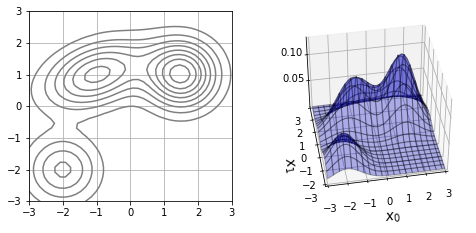

In [16]:
# リスト 9-2-(7)
# テスト ----------
pi = np.array([0.2, 0.4, 0.4])
mu = np.array([[-2, -2], [-1, 1], [1.5, 1]])
sigma = np.array([
    [[0.5, 0], [0, 0.5]],
    [[1, 0.25], [0.25, 0.5]],
    [[0.5, 0], [0, 0.5]],
])
plt.figure(figsize=(8, 3.5))
# 等高線表示
plt.subplot(1, 2, 1)
show_contour_mixgauss(pi, mu, sigma)
plt.grid()
# サーフェス表示
ax = plt.subplot(1, 2, 2, projection="3d")
show3d_mixgauss(ax, pi, mu, sigma)
ax.set_zticks([0.05, 0.10])
ax.set_xlabel("$x_0$", fontsize=14)
ax.set_ylabel("$x_1$", fontsize=14)
ax.view_init(40, -100)
plt.xlim(X0_min, X0_max)
plt.ylim(X1_min, X1_max)
plt.show()

### 9.3.3 EMアルゴリズムの概要

### 9.3.4 Step 0: 変数の準備と初期化

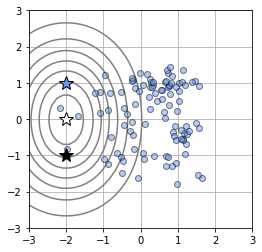

In [17]:
# リスト 9-2-(8)
# パラメータの図示関数 ----------
def show_mixgauss_prm(x, gamma, pi, mu, sigma):
    cols = np.array([  # 各クラスの描画色
        [0.4, 0.6, 0.95],
        [1, 1, 1],
        [0, 0, 0],
    ])
    N = x.shape[0]
    K = len(pi)
    show_contour_mixgauss(pi, mu, sigma)
    # データ点の描画
    for n in range(N):
        col = (  # プロットの色をgammaで混合し作成
            gamma[n, 0] * cols[0]
          + gamma[n, 1] * cols[1]
          + gamma[n, 2] * cols[2]
        )
        plt.plot(
            x[n, 0], x[n, 1], color=col,
            marker="o", markeredgecolor="black",
            markersize=6, alpha=0.5,
        )
    # 中心ベクトルの描画
    for k in range(K):
        plt.plot(
            mu[k, 0], mu[k, 1], color=cols[k],
            marker="*", markeredgecolor="black",
            markersize=15, markeredgewidth=1,
        )
    plt.grid()

# メイン ----------
N = X.shape[0]  # データ数
# パラメータの初期化
Pi = np.array([0.33, 0.33, 0.34])
Mu = np.array([[-2, 1], [-2, 0], [-2, -1]])
Sigma = np.array([[[1, 0], [0, 1]], [[1, 0], [0, 1]], [[1, 0], [0, 1]]])
Gamma = np.c_[np.ones((N, 1)), np.zeros((N, 2))]
# グラフ描画
plt.figure(figsize=(4, 4))
show_mixgauss_prm(X, Gamma, Pi, Mu, Sigma)
plt.show()

### 9.3.5 Step 1 (E Step): $\gamma$の更新

In [18]:
# リスト 9-2-(9)
# gamma を更新する (E Step) ----------
def e_step_mixgauss(x, pi, mu, sigma):
    N = x.shape[0]
    K = len(pi)
    y = np.zeros((N, K))
    # ガウス関数の値の計算
    for k in range(K):
        y[:, k] = gauss(x, mu[k, :], sigma[k, :, :])
    # 式9-16で、負担率gammaを計算
    gamma = np.zeros((N, K))
    for n in range(N):
        a = np.zeros(K)
        for k in range(K):
            a[k] = pi[k] * y[n, k]
        gamma[n, :] = a / np.sum(a)
    return gamma

# メイン ----------
Gamma = e_step_mixgauss(X, Pi, Mu, Sigma)

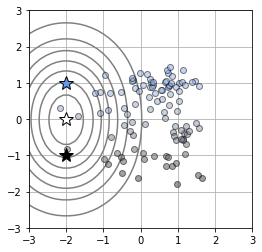

In [19]:
# リスト 9-2-(10)
# パラメータ表示 ----------
plt.figure(figsize=(4, 4))
show_mixgauss_prm(X, Gamma, Pi, Mu, Sigma)
plt.show()

### 9.3.6 Step 2(M Step): $\pi$, $\mu$, $\Sigma$の更新

In [20]:
# リスト 9-2-(11)
# Pi、Mu、Sigma を更新する (M step) ----------
def m_step_mixgauss(x, gamma):
    N, D = x.shape
    K = gamma.shape[1]
    # 式9-17で、N_kを計算
    N_k = np.sum(gamma, axis=0)
    # 式9-18で、piを計算
    pi = N_k / N
    # 式9-19で、muを計算
    mu = np.zeros((K, D))
    for k in range(K):
        for d in range(D):
            mu[k, d] = gamma[:, k] @ x[:, d] / N_k[k]
    # 式9-20で、sigmaを計算
    sigma = np.zeros((K, D, D))
    for k in range(K):
        sigma_k = np.zeros((D, D))
        for n in range(N):
            x_mu = x[n, :] - mu[k, :]  # x - mu 
            x_mu = x_mu.reshape(2, 1)  # 縦ベクトルに直す
            sigma_k = sigma_k + gamma[n, k] * x_mu @ x_mu.T
        sigma[k, :, :] = sigma_k / N_k[k]
    return pi, mu, sigma

# メイン ----------
Pi, Mu, Sigma = m_step_mixgauss(X, Gamma)

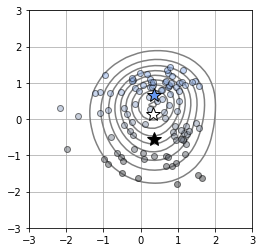

In [21]:
# リスト 9-2-(12)
# パラメータ表示 ----------
plt.figure(figsize=(4, 4))
show_mixgauss_prm(X, Gamma, Pi, Mu, Sigma)
plt.show()

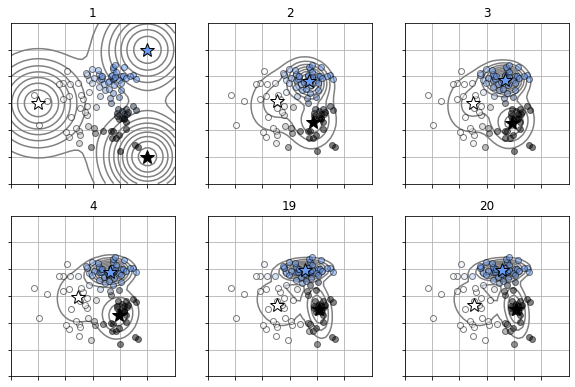

In [22]:
# リスト 9-2-(13)
# パラメータの初期化 --------
Pi = np.array([0.3, 0.3, 0.4])
Mu = np.array([[2, 2], [-2, 0], [2, -2]])
Sigma = np.array([[[1, 0], [0, 1]], [[1, 0], [0, 1]], [[1, 0], [0, 1]]])
Gamma = np.c_[np.ones((N, 1)), np.zeros((N, 2))]
max_it = 20  # 繰り返しの回数

# メイン --------
plt.figure(figsize=(10, 6.5))
i_subplot = 1
for it in range(0, max_it):
    Gamma = e_step_mixgauss(X, Pi, Mu, Sigma)  # E-step
    if it < 4 or it > 17:                      # パラメータの描画
        plt.subplot(2, 3, i_subplot)
        show_mixgauss_prm(X, Gamma, Pi, Mu, Sigma)
        plt.title("{0:d}".format(it + 1))
        plt.xticks(range(X0_min, X0_max), "")
        plt.yticks(range(X1_min, X1_max), "")
        i_subplot = i_subplot + 1
    Pi, Mu, Sigma = m_step_mixgauss(X, Gamma)  # M-step
plt.show()

### 9.3.7 尤度

In [23]:
# リスト 9-2-(14)
# 混合ガウスの誤差関数 ----------
def nlh_mixgauss(x, pi, mu, sigma):
    # x: NxD
    # pi: Kx1
    # mu: KxD
    # sigma: KxDxD
    # output err: NxK
    N = x.shape[0]
    K = len(pi)
    # ガウス関数の値を計算
    y = np.zeros((N, K))
    for k in range(K):
        y[:, k] = gauss(x, mu[k, :], sigma[k, :, :])
    # 式9-22で、対数尤度の計算
    lh = 0
    for n in range(N):
        sum_pi_g = 0
        for k in range(K):
            sum_pi_g = sum_pi_g + pi[k] * y[n, k]
        lh = lh + np.log(sum_pi_g)
    # 誤差関数に変換
    err = -lh
    return err

Err = [426.22 229.86 224.32 220.8  218.63 216.93 215.93 215.51 215.33 215.24
 215.18 215.15 215.13 215.11 215.1  215.1  215.09 215.09 215.08 215.08]


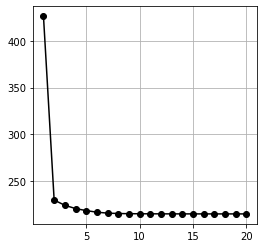

In [24]:
# リスト 9-2-(15)
# パラメータの初期化 ----------
Pi = np.array([0.3, 0.3, 0.4])
Mu = np.array([[2, 2], [-2, 0], [2, -2]])
Sigma = np.array([[[1, 0], [0, 1]], [[1, 0], [0, 1]], [[1, 0], [0, 1]]])
Gamma = np.c_[np.ones((N, 1)), np.zeros((N, 2))]

# 誤差関数の計算 ----------
max_it = 20
it = 0
Err = np.zeros(max_it)
for it in range(0, max_it):
    Gamma = e_step_mixgauss(X, Pi, Mu, Sigma)  # E-step
    Err[it] = nlh_mixgauss(X, Pi, Mu, Sigma)   # 誤差関数の値を計算
    Pi, Mu, Sigma = m_step_mixgauss(X, Gamma)  # M-step
# 結果表示
print('Err =', np.round(Err, 2))

# グラフ描画 ----------
plt.figure(figsize=(4, 4))
plt.plot(np.arange(max_it) + 1, Err, "black", linestyle="-", marker="o")
plt.grid()
plt.show()